### Basic Logistic Regression
Predict the student who get admitted or not in a campus based on SAT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #using statatistic model library
sns.set()

In [2]:
df = pd.read_csv('udemy_data/2.01. Admittance.csv')
df.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
#encode the admitted
data = df.copy()
data['Admitted']=data['Admitted'].map({'No':0,'Yes':1})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
#define the class and feature from the data
y = data['Admitted'] #class
x1 = data['SAT'] #feature

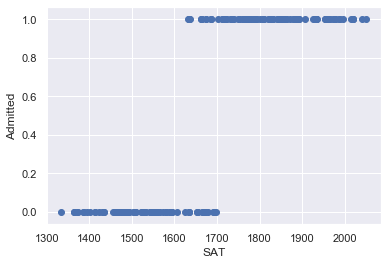

In [5]:
#visualize the data
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()
#the plot will looks like bellow if the data is categorical.

### Try plot with linear regression

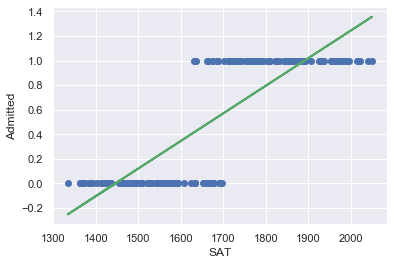

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
result_lin = reg_lin.fit()

plt.scatter(x1,y)
y_hat = result_lin.params[0]+result_lin.params[1]*x1 #result_lin.params[0] is intercepr and [1] is coef from SAT

plt.plot(x1, y_hat, lw=2, c='g')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

- Look at the diagram above, we cann't use linear regression in categorical data because it doesn't fit with our data. 
- So we will use logistic approach (non-linear data)

### Plot with Logistic Regression Curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


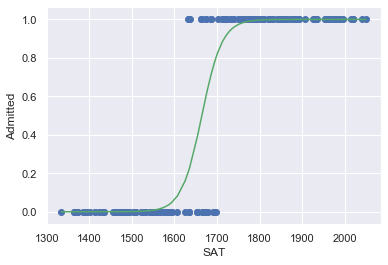

In [7]:
reg_log = sm.Logit(y,x) #logit is the library to get the logistic model
result_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

f_sorted = np.sort(f(x1, result_log.params[0], result_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
plt.plot(x_sorted,f_sorted, c = 'g')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

- This is the probability of Admitted based on SAT score
- If SAT score < 1530, admitted = 0
- If SAT score > 1750, admitted = 1
- If SAT score == 1700, admitted = 0.8 == 80% to 1 <br>
Note: Log is the opposite of the exponential <br>
Logit ==> log(odds) = B0 + B1X1+ ...